In [2]:
import pandas as pd
import numpy as np
import random
from preprocess_with_packet_flow_no_load import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [3]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30, n_iter=5)
svd_normal = svd.fit_transform(processed_normal.values)
svd_attack = svd.fit_transform(processed_attack.values)


# In[4]:


from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    svd_normal, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(25, input_dim=svd_normal.shape[1], activation='LeakyReLU'))
model.add(Dense(3, activation='LeakyReLU')) # size to compress to
model.add(Dense(25, activation='LeakyReLU'))
model.add(Dense(svd_normal.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=50)
model.save("svd_auto_packet_flow")

Epoch 1/50


2022-03-19 19:19:26.268509: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-19 19:19:26.376662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 13s 4ms/step - loss: 0.0416
Epoch 2/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0214
Epoch 3/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0181
Epoch 4/50
3514/3514 [==============================] - 16s 5ms/step - loss: 0.0160
Epoch 5/50
3514/3514 [==============================] - 14s 4ms/step - loss: 0.0151
Epoch 6/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0146
Epoch 7/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0143
Epoch 8/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0140
Epoch 9/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0137
Epoch 10/50
3514/3514 [==============================] - 12s 4ms/step - loss: 0.0134
Epoch 11/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0132
Epoch 12/50
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0131


2022-03-19 19:30:25.854183: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: svd_auto_packet_flow/assets


INFO:tensorflow:Assets written to: svd_auto_packet_flow/assets


2022-03-19 19:30:26.054952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.10058354036739472
0.10008320271712416


<AxesSubplot:>

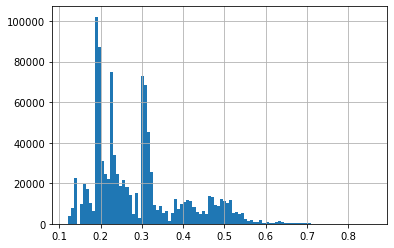

In [5]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))


# In[10]:


pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))


# In[12]:


pred_attack = model.predict(svd_attack)

score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],svd_attack[index])))

attack_df['score'] = score_list


# In[13]:


attack_df['score'].hist(bins = 100)

0.4700147835799279

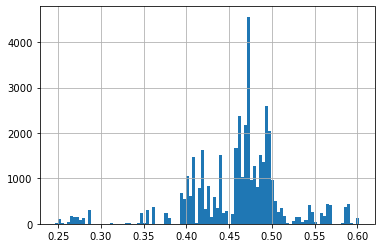

In [10]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].median()

<AxesSubplot:>

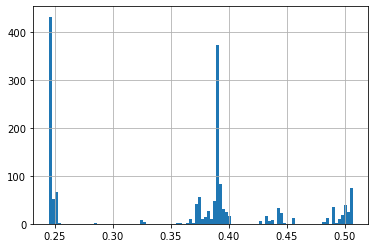

In [7]:
normal_wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']
normal_wordpress['score'].hist(bins=100)

In [8]:
attack_df['score'].median()

0.2594641855402455

In [9]:
attack_df['score'].value_counts()

0.282726    225
0.391242    169
0.246720    152
0.307834    152
0.235313    104
           ... 
0.206250      1
0.437298      1
0.341553      1
0.205607      1
0.418421      1
Name: score, Length: 501470, dtype: int64

In [12]:
attack_df['score'].median()

0.2594641855402455

In [13]:
synthetic_data = pd.read_csv('data/synthetic_data.csv')
processed_syn = process_df(synthetic_data)

In [14]:
syn_svd = svd.fit_transform(processed_syn.values)

In [18]:
pred_attack = model.predict(syn_svd)

score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(metrics.mean_squared_error(pred_attack[index],syn_svd[index]))

synthetic_data['score'] = score_list

<AxesSubplot:>

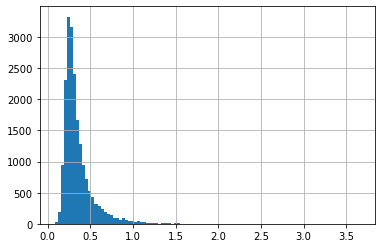

In [19]:
synthetic_data['score'].hist(bins = 100)

In [20]:
set(attack_df['ip.dst'])

{'10.240.0.4',
 '10.244.0.1',
 '10.244.0.10',
 '10.244.0.11',
 '10.244.0.14',
 '10.244.0.15',
 '10.244.0.2',
 '10.244.0.3',
 '10.244.0.4',
 '10.244.0.5',
 '10.244.0.6',
 '10.244.0.7',
 '10.244.0.9',
 '13.69.106.208',
 '13.69.106.211',
 '13.69.106.212',
 '13.69.106.215',
 '13.69.106.216',
 '13.69.106.217',
 '13.69.106.89',
 '13.69.114.0',
 '13.69.65.27',
 '13.69.65.29',
 '13.69.65.31',
 '13.69.67.61',
 '142.250.179.138',
 '142.250.179.142',
 '142.251.36.42',
 '151.139.128.11',
 '168.63.129.16',
 '169.254.169.254',
 '172.217.168.234',
 '198.143.164.243',
 '198.143.164.251',
 '20.126.199.164',
 '20.50.65.82',
 '216.58.214.14',
 '40.113.176.128',
 '45.83.65.187',
 '45.83.65.88',
 '52.236.186.218',
 '66.249.81.204',
 '66.249.81.206',
 '66.249.83.12',
 '66.249.83.14',
 '66.249.83.16',
 '89.100.107.147',
 '89.100.107.148',
 '99.84.11.20',
 '99.84.11.57',
 '99.84.11.83'}

<AxesSubplot:>

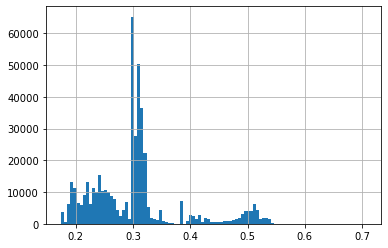

In [21]:
random_ip = attack_df[attack_df["ip.dst"] == '10.244.0.15']
random_ip['score'].hist(bins=100)

In [23]:
external= attack_df[attack_df["destination_external"] == 1]

<AxesSubplot:>

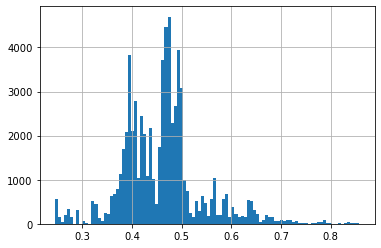

In [24]:
external['score'].hist(bins=100)

<AxesSubplot:>

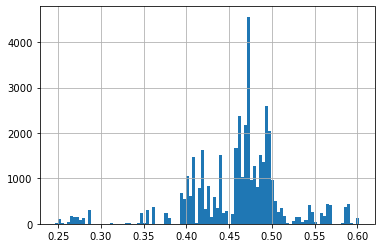

In [25]:
nmap_df['score'].hist(bins = 100)